In [1]:
import librosa
import librosa.display

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Audio, display, Image, YouTubeVideo

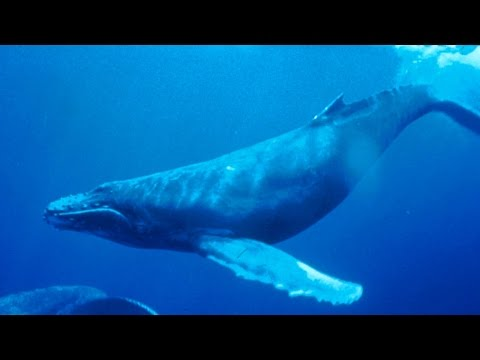

In [2]:
filename = 'Haunting_song_of_humpback_whales-youtube-W5Trznre92c.wav'
YouTubeVideo('W5Trznre92c')

In [3]:
y, sr = librosa.load(filename)
# trim silent edges
whale_song, _ = librosa.effects.trim(y)
Audio(data=whale_song, rate=sr)

In [7]:
n_fft = 2048
hop_length = 512
n_mels = 128

In [8]:
D = np.abs(librosa.stft(whale_song, n_fft=n_fft, hop_length=hop_length))

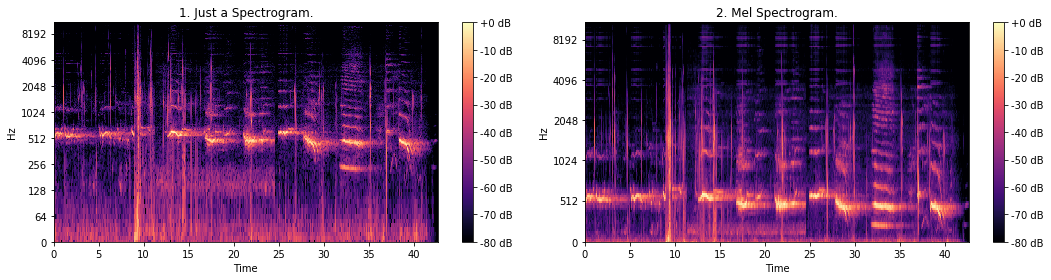

In [9]:
plt.figure(figsize=(15, 4));

plt.subplot(1, 2, 1);
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('1. Just a Spectrogram.');


plt.subplot(1, 2, 2);
S = librosa.feature.melspectrogram(whale_song)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');
plt.title('2. Mel Spectrogram.');

plt.tight_layout();

In [10]:
chroma_ = librosa.feature.chroma_cqt(y=whale_song)
chroma_filtered = librosa.decompose.nn_filter(chroma_, aggregate=np.median, metric='cosine')

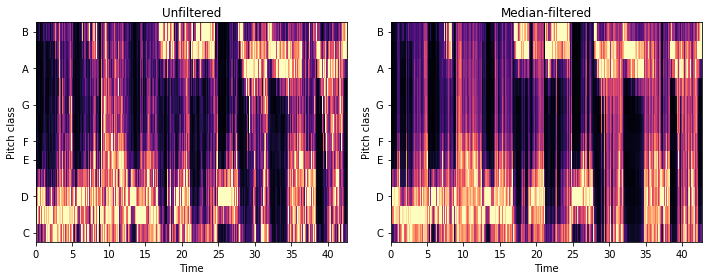

In [11]:
plt.figure(figsize=(10, 4));

plt.subplot(1, 2, 1);
librosa.display.specshow(chroma_, x_axis='time', y_axis='chroma');
plt.title('Unfiltered');

plt.subplot(1, 2, 2);
librosa.display.specshow(chroma_filtered, x_axis='time', y_axis='chroma');
plt.title('Median-filtered');

plt.tight_layout();

In [12]:
S_filtered = librosa.decompose.nn_filter(S, aggregate=np.median, metric='cosine')
D_filtered = librosa.decompose.nn_filter(D, aggregate=np.median, metric='cosine')

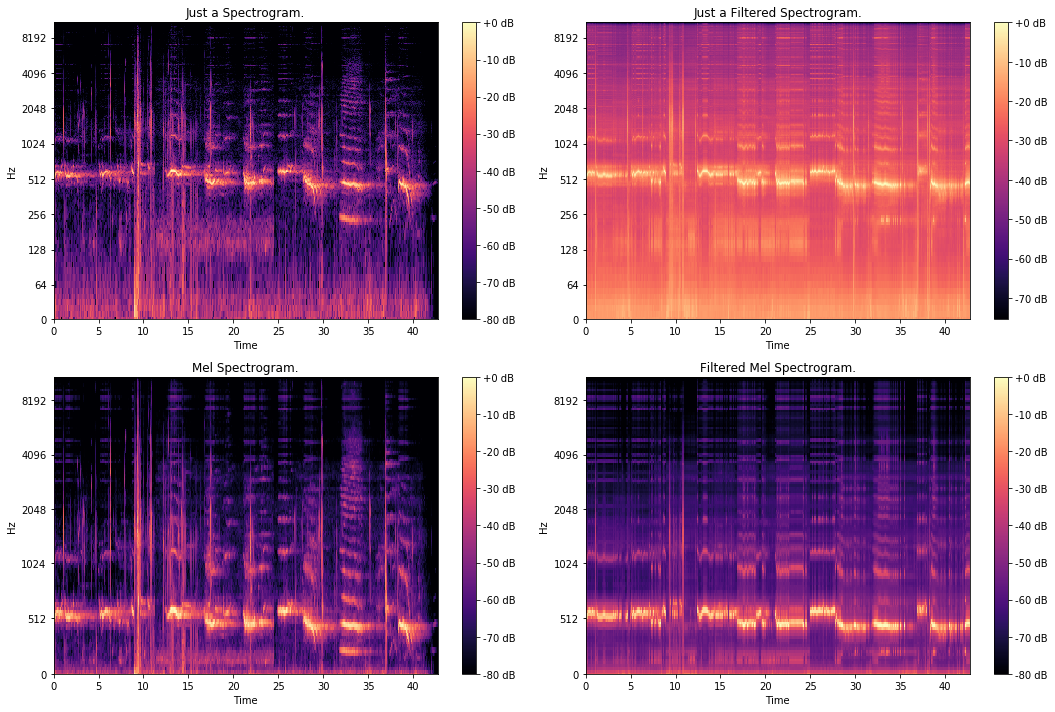

In [13]:
plt.figure(figsize=(15, 10));

plt.subplot(2, 2, 1);
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Just a Spectrogram.');

plt.subplot(2, 2, 2);
librosa.display.specshow(librosa.power_to_db(D_filtered, ref=np.max), x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Just a Filtered Spectrogram.');


plt.subplot(2, 2, 3);
S = librosa.feature.melspectrogram(whale_song)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');
plt.title('Mel Spectrogram.');

plt.subplot(2, 2, 4);
librosa.display.specshow(librosa.power_to_db(S_filtered, ref=np.max), x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');
plt.title('Filtered Mel Spectrogram.');

plt.tight_layout();